<a href="https://colab.research.google.com/github/payares0510/metodos-computacionales-1/blob/main/Parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import sympy as sym
import math

x = sym.symbols('x')

def polinomio_laguerre(n):
    termino_interno = sym.exp(-x) * x**n
    derivada_n = sym.diff(termino_interno, x, n)
    polinomio = (sym.exp(x) / math.factorial(n)) * derivada_n
    polinomio_simplificado = sym.simplify(polinomio)

    return polinomio_simplificado
for n in range(1,6):
    polinomio = polinomio_laguerre(n)
    print(f"L_{n}(x) = {polinomio}")


L_1(x) = 1 - x
L_2(x) = x**2/2 - 2*x + 1
L_3(x) = -x**3/6 + 3*x**2/2 - 3*x + 1
L_4(x) = x**4/24 - 2*x**3/3 + 3*x**2 - 4*x + 1
L_5(x) = -x**5/120 + 5*x**4/24 - 5*x**3/3 + 5*x**2 - 5*x + 1


Punto a

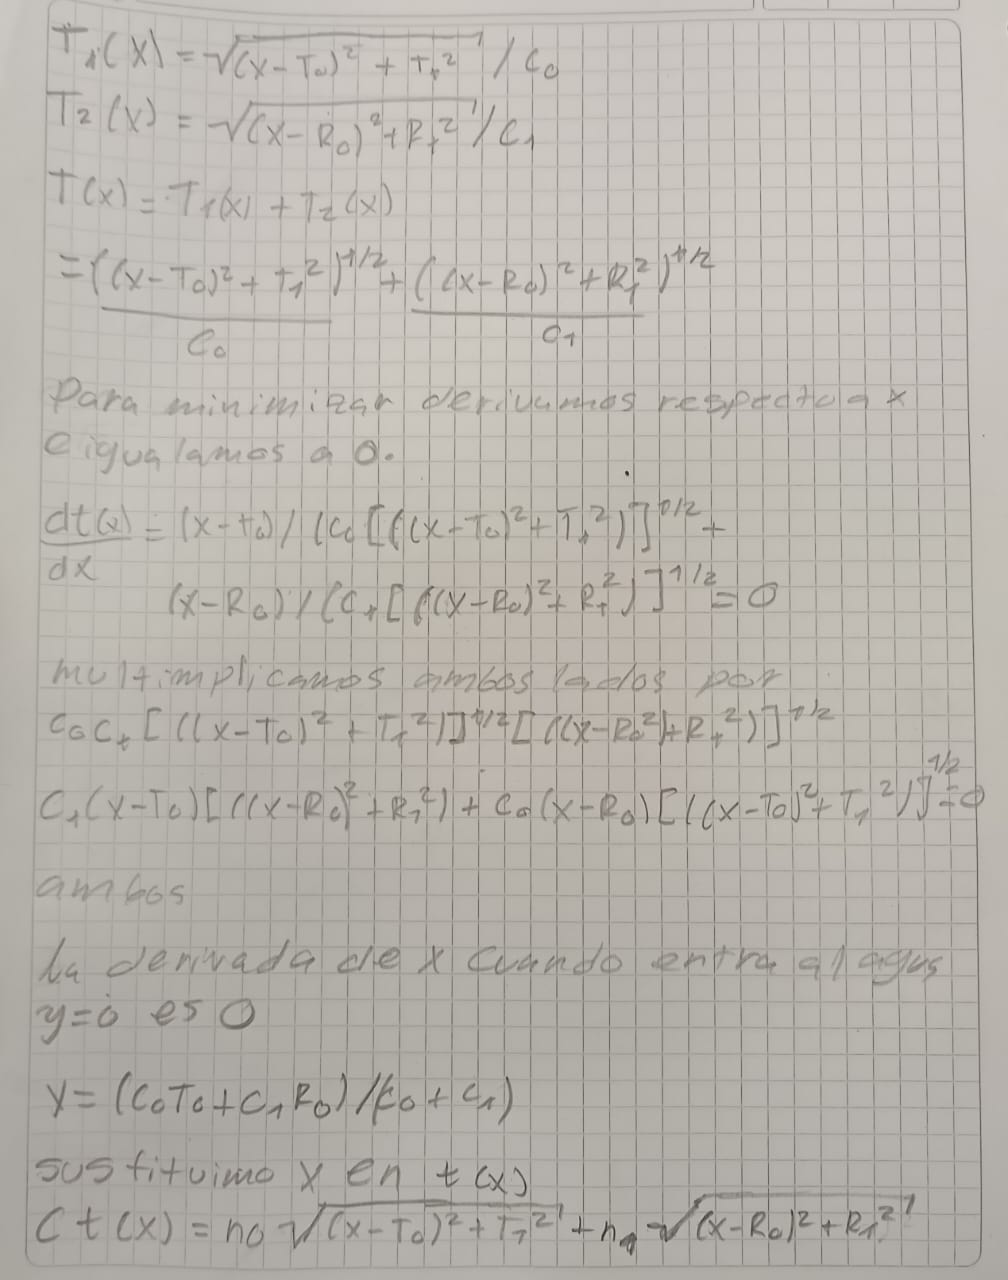

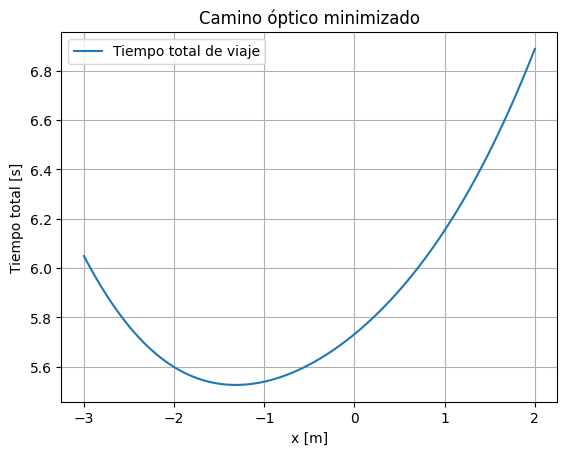

In [8]:
#Pregunta B#

import numpy as np
import matplotlib.pyplot as plt

n_air = 1.0
n_water = 1.33
transmitter = np.array([-3, 2])
receiver = np.array([2, -2])

def travel_time(x):
    d_air = np.sqrt((x - transmitter[0])**2 + (0 - transmitter[1])**2)
    d_water = np.sqrt((x - receiver[0])**2 + (0 - receiver[1])**2)
    t_total = (d_air / n_air) + (d_water / n_water)

    return t_total

x_values = np.linspace(transmitter[0], receiver[0], 100)
t_values = [travel_time(x) for x in x_values]

plt.plot(x_values, t_values, label='Tiempo total de viaje')
plt.xlabel('x [m]')
plt.ylabel('Tiempo total [s]')
plt.title('Camino óptico minimizado')
plt.grid(True)
plt.legend()
plt.show()


In [9]:
#Pregunta C#

def derivative(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

def second_derivative(f, x, h=1e-5):
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h ** 2)

def newton_raphson(f, x0, tol=1e-9, max_iter=1000):
    x = x0
    for _ in range(max_iter):
        f_prime = derivative(f, x)
        f_double_prime = second_derivative(f, x)
        if abs(f_prime) < tol:
            return x
        x = x - f_prime / f_double_prime
    return x
x_initial = (transmitter[0] + receiver[0]) / 2
x_min = newton_raphson(travel_time, x_initial)
t_min = travel_time(x_min)

print(f'El valor de x que minimiza el tiempo de viaje es: {x_min:.5f}')
print(f'El tiempo mínimo de viaje es: {t_min:.5f} seg')


El valor de x que minimiza el tiempo de viaje es: -1.31691
El tiempo mínimo de viaje es: 5.52616 unidades de tiempo


In [12]:
#Pregunta D#

def calculate_angles(x_min):
    d_air = np.sqrt((x_min - transmitter[0])**2 + (0 - transmitter[1])**2)
    alpha_0 = np.arcsin((x_min - transmitter[0]) / d_air)
    d_water = np.sqrt((x_min - receiver[0])**2 + (0 - receiver[1])**2)
    alpha_1 = np.arcsin((x_min - receiver[0]) / d_water)

    return np.degrees(alpha_0), np.degrees(alpha_1)

alpha_0, alpha_1 = calculate_angles(x_min)

print(f'Ángulo de incidencia (aire): {alpha_0:.5f} grados')
print(f'Ángulo de refracción (agua): {alpha_1:.5f} grados')


Ángulo de incidencia (aire): 40.08219 grados
Ángulo de refracción (agua): -58.91122 grados


In [13]:
#Pregunta E#
def snell_law(alpha_0, alpha_1):
    left_side = np.sin(np.radians(alpha_0)) / n_air
    right_side = np.sin(np.radians(alpha_1)) / n_water
    return np.isclose(left_side, right_side)
valid = snell_law(alpha_0, alpha_1)

print(f"¿Se cumple la ley de Snell? {'Sí' if valid else 'No'}")


¿Se cumple la ley de Snell? No


Polinomio de Lagrange: -0.363586737855857*x**2 + 1.2077404846629*x
Estimación de sin(pi/8): 0.41820893444311996
Valor verdadero de sin(pi/8): 0.3826834323650898
Error de la estimación: 0.03552550207803018


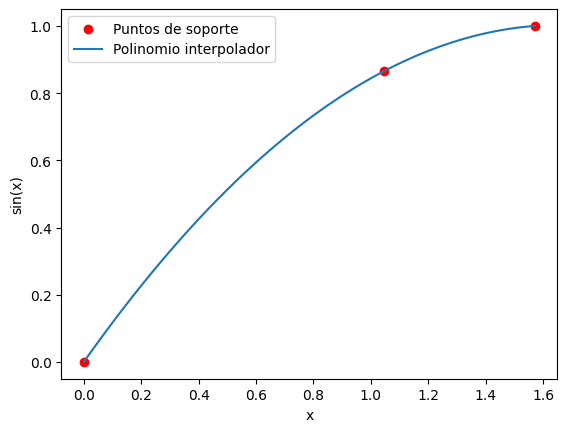

Error teórico: 0.0466244537830583


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

xi = np.array([0, np.pi/3, np.pi/2])
fi = np.sin(xi)

def PolinomioLagrange(x, xi, i):
    L = 1
    for j in range(len(xi)):
        if i != j:
            L *= (x - xi[j]) / (xi[i] - xi[j])
    return L

def Interpolacion(x, xi, fi):
    sumatoria = 0
    for i in range(len(xi)):
        sumatoria += fi[i] * PolinomioLagrange(x, xi, i)
    return sumatoria

x = sym.Symbol('x')
polinomio = Interpolacion(x, xi, fi)
polinomio_exp = sym.expand(polinomio)
print(f"Polinomio de Lagrange: {polinomio_exp}")

x_valor = np.pi/8
estimacion = Interpolacion(x_valor, xi, fi)
print("Estimación de sin(pi/8):", estimacion)

valor_verdadero = np.sin(x_valor)
print("Valor verdadero de sin(pi/8):", valor_verdadero)

error = abs(valor_verdadero - estimacion)
print("Error de la estimación:", error)

plt.scatter(xi, fi, color='red', label='Puntos de soporte')

x_vals = np.linspace(0, np.pi/2, 100)
y_vals = [Interpolacion(val, xi, fi) for val in x_vals]
plt.plot(x_vals, y_vals, label='Polinomio interpolador')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.show()

f_tercera_derivada = sym.diff(sym.sin(x), x, 3)
error_teorico = abs(f_tercera_derivada.subs(x, x_valor)) / 6 * (x_valor - xi[0]) * (x_valor - xi[1]) * (x_valor - xi[2])
print("Error teórico:", error_teorico)

